# Лабораторная работа №1

> Разработка и исследование «темпорального процессора» для информационно-аналитических систем

1. Рассмотрение теоретической части задания;
2. Представление общей структуры темпорального процессора;
3. Разработка алгоритмов моделирования темпоральных процессов;
4. Разработка алгоритмов анализа темпоральных процессов (темпорального процессора), выполнение чертежей (эскизов)
   экранных форм;
5. Написание и отладка программы моделирования темпоральных процессов;
6. Написание и отладка программы темпорального процессора;
7. Выполнение темпоральных (вычислительных) экспериментов;
8. Анализ правдоподобности результатов вычислительного эксперимента;
9. Выполнение отчетных материалов.

## Разработка формата представления темпоральных данных

In [1]:
import pandas as pd

# Создаем DataFrame с темпоральными данными
data = {
    'event': ['event1', 'event2', 'event3', 'event4'],
    'start_time': pd.to_datetime(['2023-06-01 10:00:00', '2023-06-01 10:30:00', '2023-06-01 11:00:00', '2023-06-01 11:30:00']),
    'end_time': pd.to_datetime(['2023-06-01 10:15:00', '2023-06-01 10:45:00', '2023-06-01 11:15:00', '2023-06-01 11:45:00'])
}
df = pd.DataFrame(data)

## Разработка формата записи и хранения темпоральных отношений

In [2]:
df['duration'] = (df['end_time'] - df['start_time']).dt.total_seconds()

## Разработка интерфейса пользователя для имитационной модели

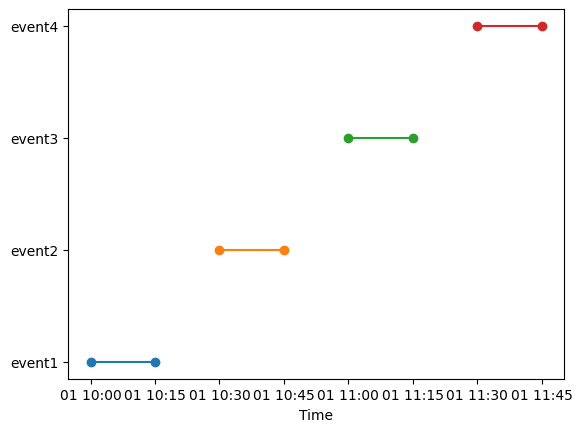

In [3]:
import matplotlib.pyplot as plt

# Визуализируем данные
fig, ax = plt.subplots()

# Для каждого события рисуем линию от начала до конца события
for i, row in df.iterrows():
    ax.plot([row['start_time'], row['end_time']], [i, i], marker = 'o')

# Устанавливаем названия осей
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df['event'])
ax.set_xlabel('Time')

plt.show()

## Разработка имитационной программы

In [4]:
# Имитация пяти темпоральных процессов и позиции наблюдателя
# Здесь мы просто генерируем случайные данные для демонстрации
import numpy as np

np.random.seed(0)
df_simulation = pd.DataFrame({
    'event': ['event' + str(i) for i in range(5)],
    'start_time': pd.to_datetime(np.random.choice(pd.date_range('2023-06-01 10:00:00', '2023-06-01 11:30:00', freq='1min'), 5)),
    'end_time': pd.to_datetime(np.random.choice(pd.date_range('2023-06-01 10:15:00', '2023-06-01 11:45:00', freq='1min'), 5))
})

## Разработка алгоритма темпоральных отношений пар процессов

In [5]:
# Здесь мы просто определяем, происходит ли одно событие после другого
def temporal_relation(event0, event1):
    if event0['end_time'] < event1['start_time']:
        return '[0] произошло перед [1]'
    elif event1['end_time'] < event0['start_time']:
        return '[1] произошло перед [0]'
    else:
        return 'события перекрываются'

In [6]:
# Применяем функцию к каждой паре событий
for i in range(len(df_simulation) - 1):
    event0 = df_simulation.iloc[i]
    event1 = df_simulation.iloc[i + 1]
    print(f'Отношение между [0]{event0["event"]} и [1]{event1["event"]}: {temporal_relation(event0, event1)}')

Отношение между [0]event0 и [1]event1: [0] произошло перед [1]
Отношение между [0]event1 и [1]event2: [1] произошло перед [0]
Отношение между [0]event2 и [1]event3: [0] произошло перед [1]
Отношение между [0]event3 и [1]event4: [0] произошло перед [1]


## Разработка формата записи и хранения темпоральных отношений

In [7]:
import json

# Здесь мы просто сохраняем DataFrame в JSONL-файл
with open('temporal_data.jsonl', 'w') as file:
    for record in df_simulation.to_dict('records'):
        # Преобразование объектов Timestamp в строки
        record['start_time'] = record['start_time'].isoformat()
        record['end_time'] = record['end_time'].isoformat()
        file.write(json.dumps(record) + '\n')